CODE BLOCK: 1

In [1]:
import model as model
import utils as utils


CODE BLOCK: 2

In [2]:
# CUDA?
utils.is_cuda()

CUDA Available? True


True

CODE BLOCK: 3

In [3]:
# Train data transformations
# Test data transformations
train_transforms, test_transforms = utils.create_data_transforms()

CODE BLOCK: 4

In [4]:
train_data, test_data = utils.get_MNIST_data('../data', train_transforms, test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

train_loader, test_loader = utils.create_data_loaders(train_data, test_data, **kwargs)

CODE BLOCK: 6

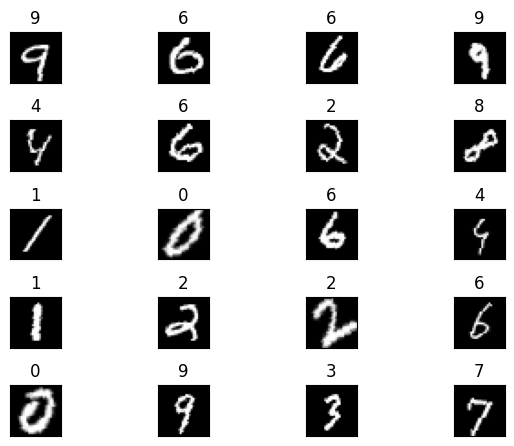

In [6]:
batch_data, batch_label = next(iter(train_loader))

utils.plotter(batch_data, batch_label, 5, 4)

CODE BLOCK: 7

In [7]:
model_obj = model.MyNet()
model_obj.to(utils.get_device())

model_obj.summary(size=(1, 28, 28))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8

CODE BLOCK: 9

CODE BLOCK: 10

In [ ]:
optimizer = utils.get_optimizer(model_obj.parameters(), lr=0.01, momentum=0.9)
scheduler = utils.get_scheduler(optimizer, step_size=3, gamma=0.1, verbose=True)

num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_obj.train_model(train_loader, optimizer)
  model_obj.test_model(test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1843 Batch_id=117 Accuracy=51.21: 100%|██████████| 118/118 [00:26<00:00,  4.37it/s]


Test set: Average loss: 0.0005, Accuracy: 9315/10000 (93.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0818 Batch_id=117 Accuracy=93.16: 100%|██████████| 118/118 [00:23<00:00,  4.98it/s]


Test set: Average loss: 0.0002, Accuracy: 9647/10000 (96.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0575 Batch_id=117 Accuracy=95.96: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0001, Accuracy: 9799/10000 (97.99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.1143 Batch_id=117 Accuracy=96.95: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0001, Accuracy: 9828/10000 (98.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=0.1007 Batch_id=85 Accuracy=97.22:  73%|███████▎  | 86/118 [00:17<00:07,  4.53it/s]

CODE BLOCK: 11

In [ ]:
model_obj.my_plots(2, 2, (15,10))